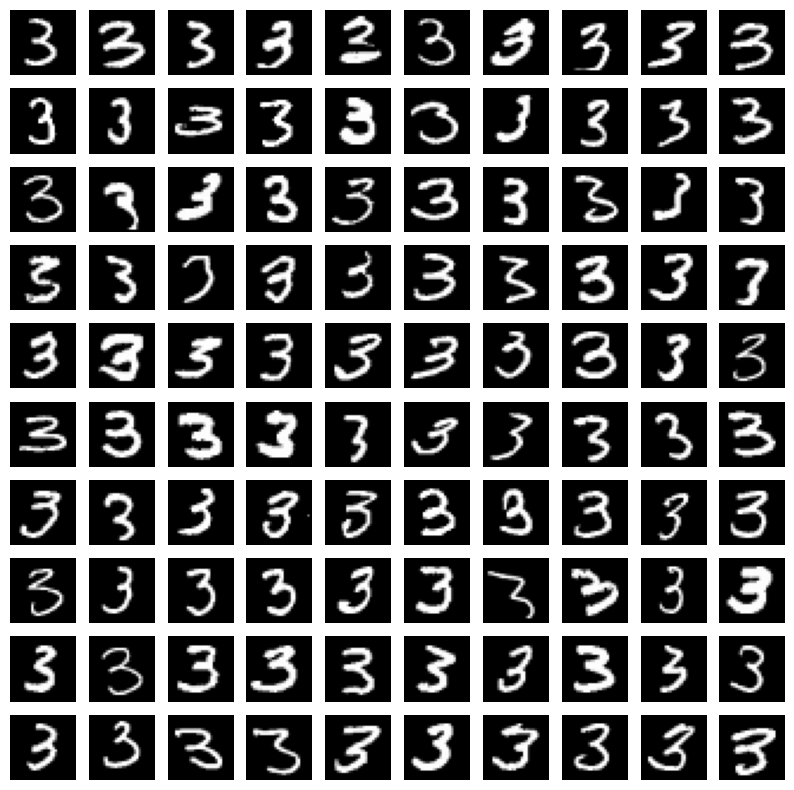

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors


# Task 1: Separate digit '3' data from train.csv file. Store only 100 images randomly from the whole corpus.

# Load train.csv file
data = pd.read_csv('/kaggle/input/digits/train.csv')

# Separate digit '3' data
digit_3_data = data[data['label'] == 3]

# Store only 100 images randomly
digit_3_subset = digit_3_data.sample(n=100, random_state=42)

# Reshape the pixel values and convert to numpy array
images = digit_3_subset.drop('label', axis=1).values.reshape(-1, 28, 28)

# Display the images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.show()

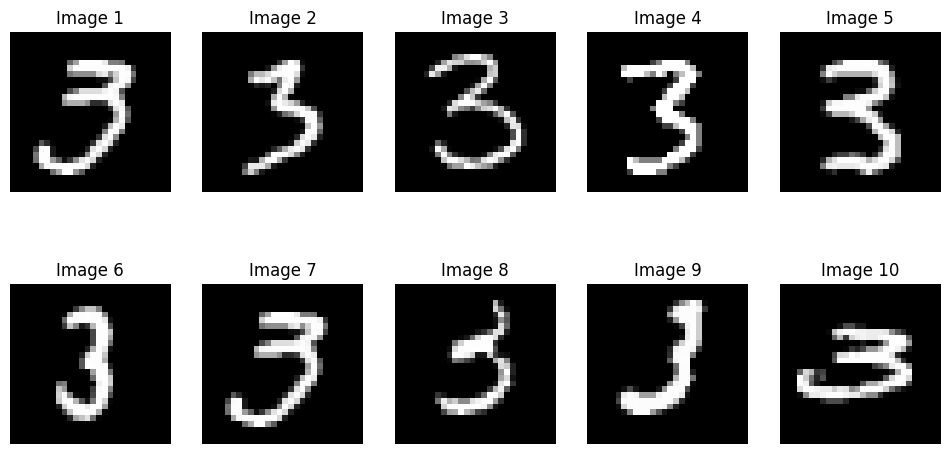

In [47]:

# Task 2: Visualize 10 randomly collected images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(digit_3_subset))
    img_data = digit_3_subset.iloc[idx, 1:].values.reshape(28, 28)
    ax.imshow(img_data, cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()


Synthetic Image 1: Source Index: 0, Destination Index: 71
Synthetic Image 2: Source Index: 1, Destination Index: 26
Synthetic Image 3: Source Index: 2, Destination Index: 17
Synthetic Image 4: Source Index: 3, Destination Index: 48
Synthetic Image 5: Source Index: 4, Destination Index: 90
Synthetic Image 6: Source Index: 5, Destination Index: 27
Synthetic Image 7: Source Index: 6, Destination Index: 40
Synthetic Image 8: Source Index: 7, Destination Index: 17
Synthetic Image 9: Source Index: 8, Destination Index: 48
Synthetic Image 10: Source Index: 9, Destination Index: 70
Synthetic Image 11: Source Index: 10, Destination Index: 11
Synthetic Image 12: Source Index: 11, Destination Index: 10
Synthetic Image 13: Source Index: 12, Destination Index: 28
Synthetic Image 14: Source Index: 13, Destination Index: 10
Synthetic Image 15: Source Index: 14, Destination Index: 66
Synthetic Image 16: Source Index: 15, Destination Index: 91
Synthetic Image 17: Source Index: 16, Destination Index: 95

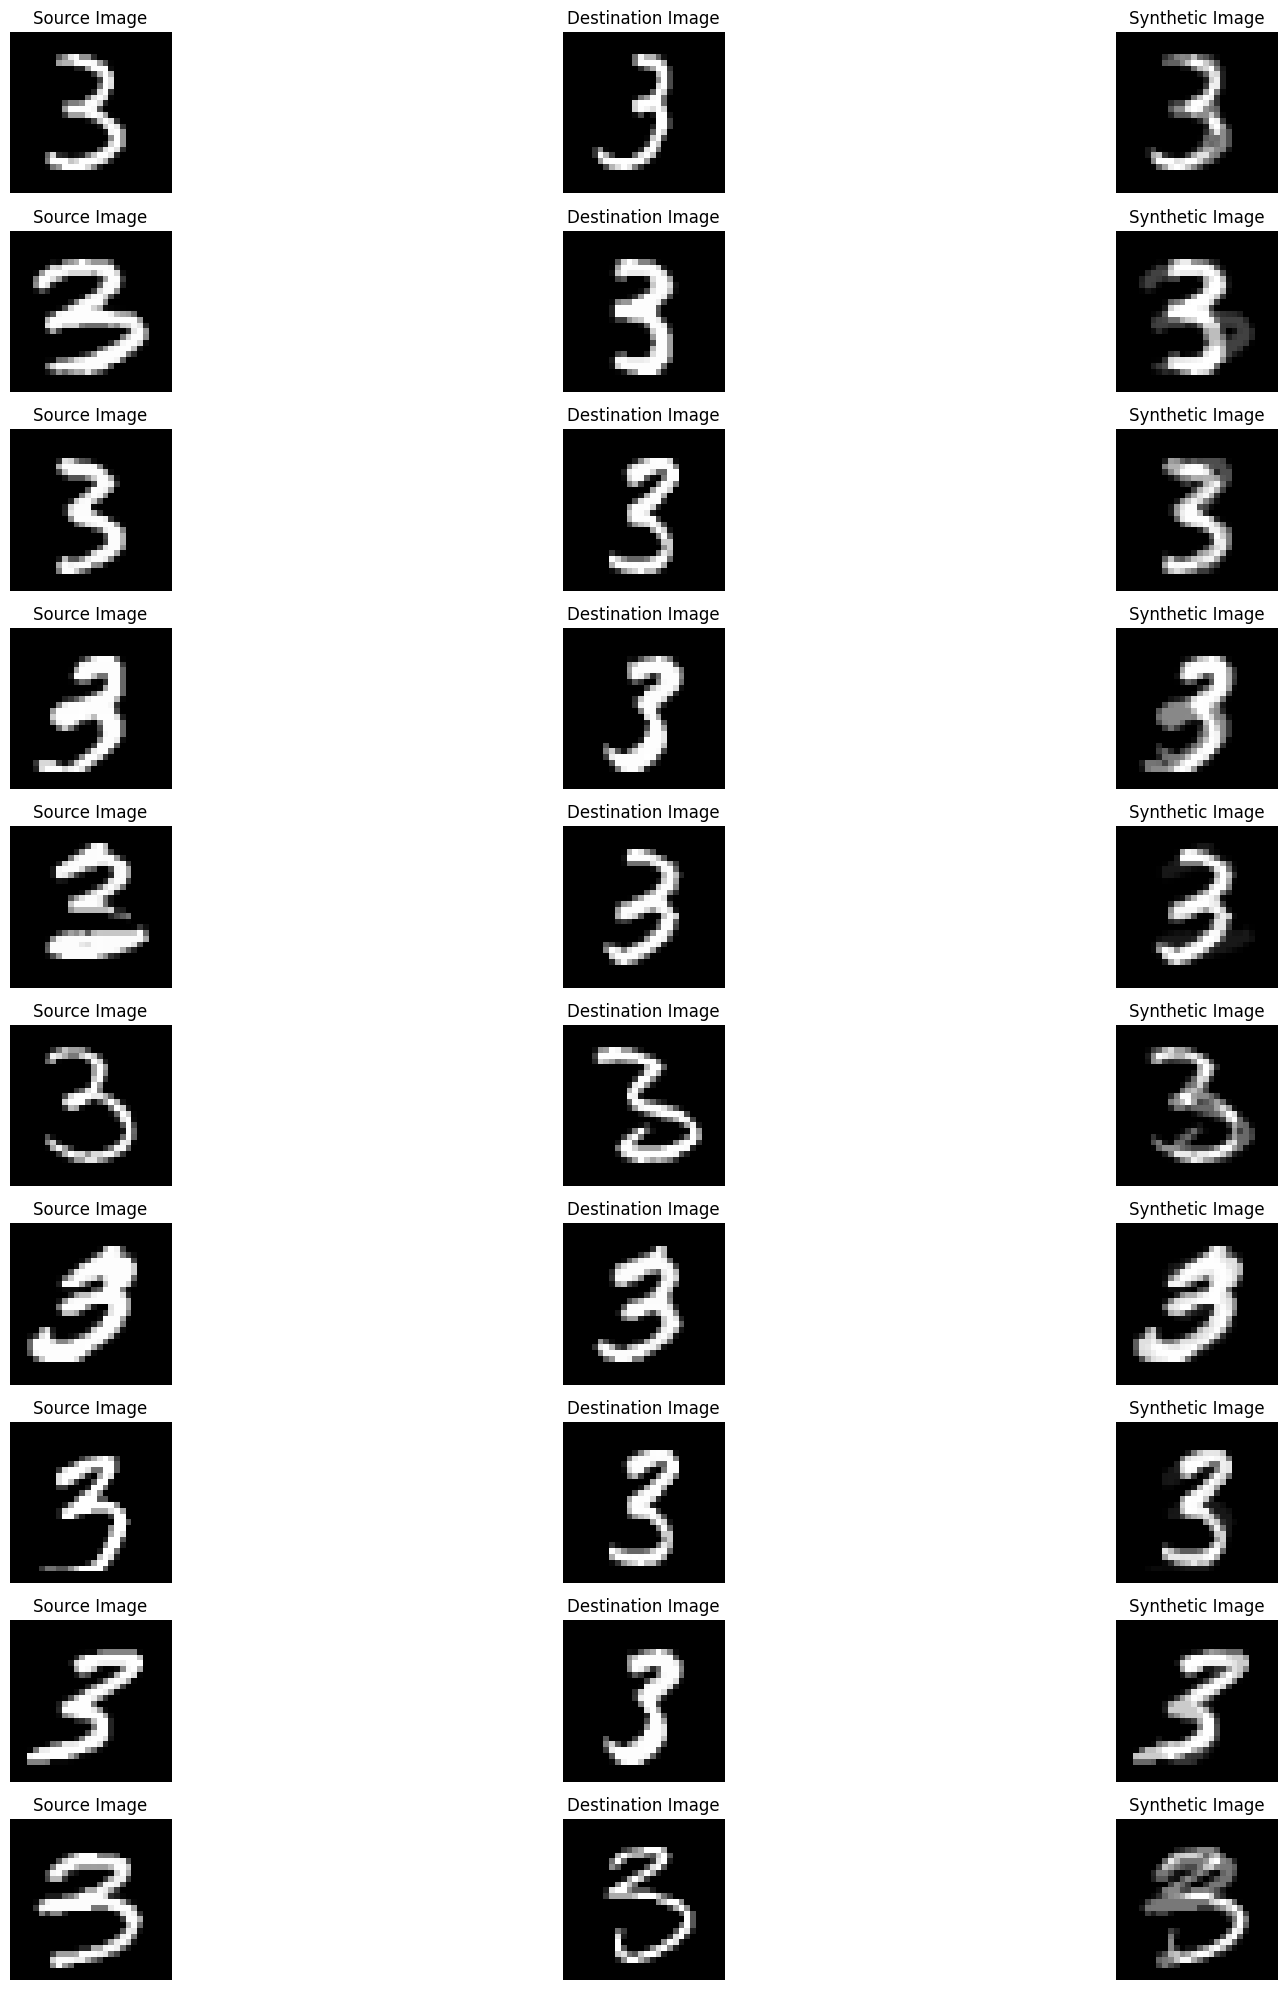

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors


# Task 3: Implement SMOTE and Populate functions

# Function to find nearest neighbors for image samples
def find_nearest_neighbors(Sample, k):
    # Flatten images into feature vectors
    feature_vectors = Sample.reshape(len(Sample), -1)
    
    # Initialize Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=k+1)  # k+1 because the nearest neighbor will always be the image itself
    
    # Fit the model to your feature vectors
    nn_model.fit(feature_vectors)
    
    # Find the indices of nearest neighbors for each sample
    _, nn_indices = nn_model.kneighbors(feature_vectors)
    
    # Remove the first column of indices (the first column contains the index of the sample itself)
    return nn_indices[:, 1:]

def SMOTE(N, i, nnarray, Sample):
    numattrs = len(Sample[0])
    newindex = 0
    Synthetic = np.zeros((N, numattrs))
    while N > 0:
        nn = np.random.randint(0, len(nnarray))
        dif = Sample[nnarray[nn]] - Sample[i]
        gap = np.random.rand()
        synthetic_sample = Sample[i] + gap * dif
        Synthetic[newindex] = synthetic_sample  
        newindex += 1
        N -= 1
    return Synthetic

def Populate(N, Sample, k):
    num_samples = len(Sample)
    numattrs = len(Sample[0])
    Synthetic = np.zeros((N * num_samples, numattrs))
    newindex = 0
    synthetic_images = [] #to store refrences for src and dest images
    
    # Find nearest neighbors only once
    nn_indices = find_nearest_neighbors(Sample, k)
    
    for _ in range(N):
        for idx in range(num_samples):
            source_index = idx
            destination_index = nn_indices[idx][np.random.randint(0, k)]
            synthetic_samples = SMOTE(1, source_index, [destination_index], Sample)
            Synthetic[newindex] = synthetic_samples[0]
            synthetic_images.append((source_index, destination_index))
            newindex += 1
    
    return Synthetic, synthetic_images


# Example usage of Populate function
N = 200  # Total number of synthetic samples to generate
k = 10   # Number of nearest neighbors

N= N//100
Sample = np.array(digit_3_subset.iloc[:, 1:])
synthetic_data, synthetic_images = Populate(N, Sample, k)


#Task4: You have to store image references for every synthetic image  generated.(Which image are considered as source and destination for every synthesized image).

# Print synthetic image number along with source and destination info
for i, (source_index, destination_index) in enumerate(synthetic_images):
    print(f"Synthetic Image {i + 1}: Source Index: {source_index}, Destination Index: {destination_index}")

# Visualize source, destination, and synthetic images
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 3, i*3 + 1)
    source_index, _ = synthetic_images[i]
    source_image = Sample[source_index].reshape(28, 28)
    plt.imshow(source_image, cmap='gray')
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(10, 3, i*3 + 2)
    destination_index = synthetic_images[i][1]
    destination_image = Sample[destination_index].reshape(28, 28)
    plt.imshow(destination_image, cmap='gray')
    plt.title('Destination Image')
    plt.axis('off')
    
    plt.subplot(10, 3, i*3 + 3)
    synthetic_image = synthetic_data[i].reshape(28, 28)
    plt.imshow(synthetic_image, cmap='gray')
    plt.title('Synthetic Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


